Article: TBA\
Code: Image Classification using Convolution Neural Network\
Prepared By: Awais Naeem (awais.naeem@embedded-robotics.com)\
Copyrights: www.embedded-robotics.com\
Disclaimer: This code can be distributed with the proper mention of the owner copyrights

In [2]:
import os
import numpy as np
import pandas as pd
import ssl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#### MNIST Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape: ', X_test.shape)
print('y_test Shape: ', y_test.shape)

X_train Shape:  (60000, 28, 28)
y_train Shape:  (60000,)
X_test Shape:  (10000, 28, 28)
y_test Shape:  (10000,)


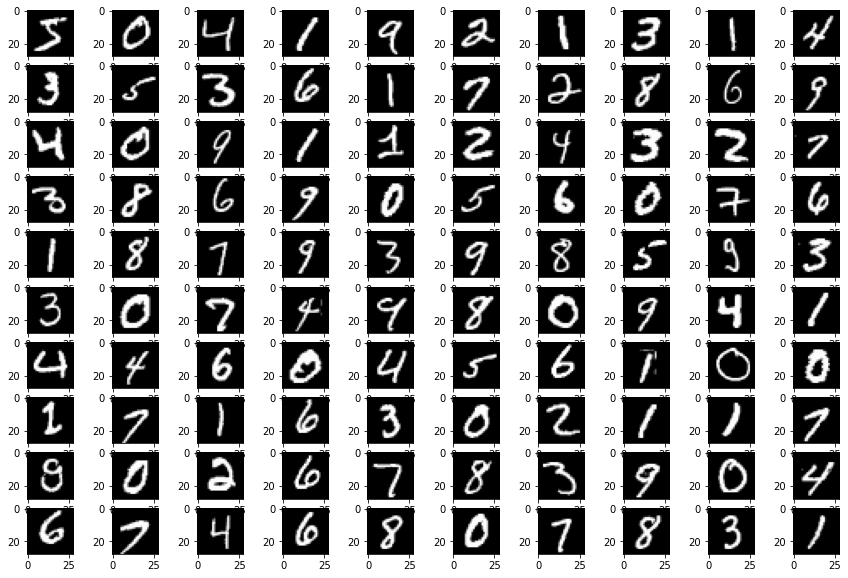

In [11]:
plt.figure(figsize=(15,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.subplots_adjust(wspace=None, hspace=None)
plt.show()

In [12]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [14]:
image_shape = X_train.shape[1:]
n_classes = len(np.unique(y_train))

In [15]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [16]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer="he_uniform", input_shape=image_shape))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(units = n_classes, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 100)               627300    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        

In [21]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
checkpoint_filepath = os.getcwd()
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='loss', mode='min', save_best_only=True)

In [26]:
callbacks = [EarlyStopping(patience=2),
             model_checkpoint_callback]

In [27]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data = (X_test, y_test), callbacks=callbacks)

Epoch 1/10
469/469 [==============================] - 40s 84ms/step - loss: 0.1450 - accuracy: 0.9579 - val_loss: 0.0644 - val_accuracy: 0.9803
Epoch 2/10
469/469 [==============================] - 43s 91ms/step - loss: 0.0999 - accuracy: 0.9709 - val_loss: 0.0522 - val_accuracy: 0.9829
Epoch 3/10
469/469 [==============================] - 37s 80ms/step - loss: 0.0827 - accuracy: 0.9759 - val_loss: 0.0469 - val_accuracy: 0.9840
Epoch 4/10
469/469 [==============================] - 35s 74ms/step - loss: 0.0682 - accuracy: 0.9795 - val_loss: 0.0419 - val_accuracy: 0.9865
Epoch 5/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0619 - accuracy: 0.9807 - val_loss: 0.0428 - val_accuracy: 0.9859
Epoch 6/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0552 - accuracy: 0.9829 - val_loss: 0.0431 - val_accuracy: 0.9858
Epoch 7/10
469/469 [==============================] - 36s 76ms/step - loss: 0.0484 - accuracy: 0.9849 - val_loss: 0.0437 - val_accuracy:

In [31]:
metrics_df = pd.DataFrame(history.history)
print(metrics_df)

       loss  accuracy  val_loss  val_accuracy
0  0.144980  0.957900  0.064440        0.9803
1  0.099907  0.970917  0.052243        0.9829
2  0.082729  0.975933  0.046908        0.9840
3  0.068244  0.979467  0.041944        0.9865
4  0.061921  0.980700  0.042802        0.9859
5  0.055164  0.982850  0.043078        0.9858
6  0.048413  0.984933  0.043730        0.9862


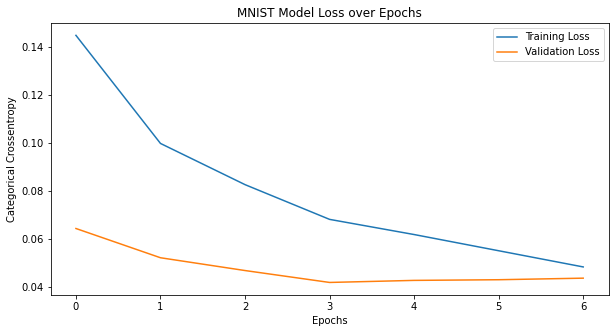

In [40]:
plt.figure(figsize=(10,5))
plt.plot(metrics_df.index, metrics_df.loss)
plt.plot(metrics_df.index, metrics_df.val_loss)
plt.title('MNIST Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

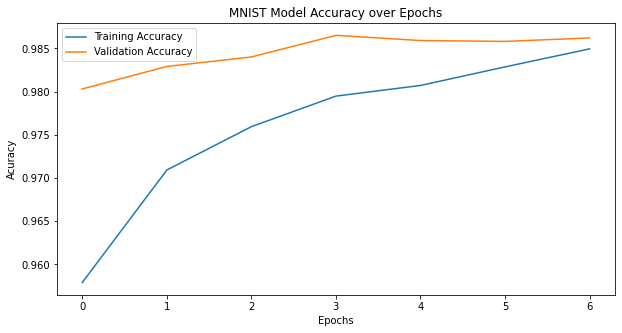

In [41]:
plt.figure(figsize=(10,5))
plt.plot(metrics_df.index, metrics_df.accuracy)
plt.plot(metrics_df.index, metrics_df.val_accuracy)
plt.title('MNIST Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Acuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

#### CIFAR10 Dataset

In [42]:
ssl._create_default_https_context = ssl._create_unverified_context
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [43]:
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape: ', X_test.shape)
print('y_test Shape: ', y_test.shape)

X_train Shape:  (50000, 32, 32, 3)
y_train Shape:  (50000, 1)
X_test Shape:  (10000, 32, 32, 3)
y_test Shape:  (10000, 1)


In [47]:
image_shape = X_train.shape[1:]
n_classes = len(np.unique(y_train))

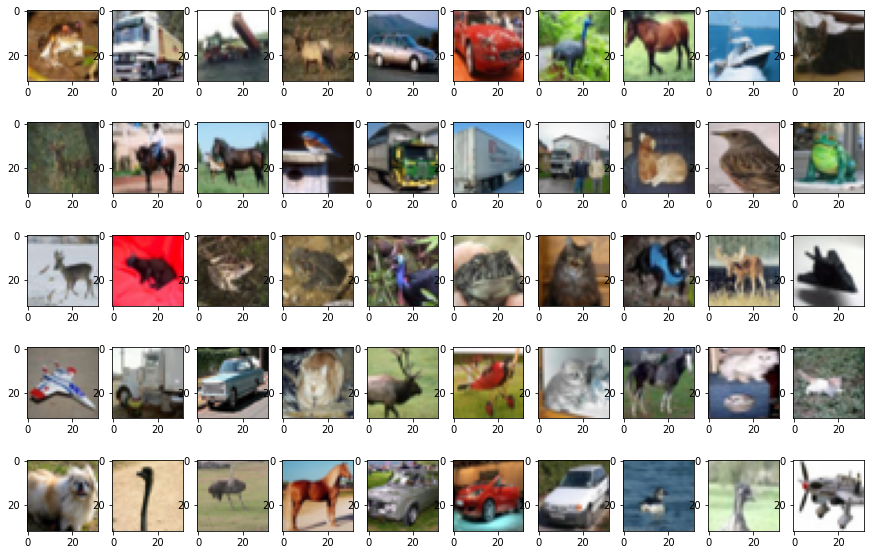

In [46]:
plt.figure(figsize=(15,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(X_train[i])
plt.show()

In [49]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [50]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape = image_shape))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(units=100, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation="softmax"))

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

In [52]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [53]:
checkpoint_filepath = os.getcwd()
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='loss', mode='min', save_best_only=True)

In [54]:
callbacks = [EarlyStopping(patience=10),
             model_checkpoint_callback]


In [55]:
saved_model = tf.keras.models.load_model(checkpoint_filepath)

In [57]:
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/200
1563/1563 [==============================] - 142s 85ms/step - loss: 1.4470 - accuracy: 0.4796 - val_loss: 1.1115 - val_accuracy: 0.6139
Epoch 2/200
1563/1563 [==============================] - 126s 81ms/step - loss: 1.1045 - accuracy: 0.6101 - val_loss: 0.9713 - val_accuracy: 0.6568
Epoch 3/200
1563/1563 [==============================] - 115s 74ms/step - loss: 0.9707 - accuracy: 0.6581 - val_loss: 0.9375 - val_accuracy: 0.6691
Epoch 4/200
1563/1563 [==============================] - 131s 84ms/step - loss: 0.8757 - accuracy: 0.6893 - val_loss: 0.9045 - val_accuracy: 0.6835
Epoch 5/200
1563/1563 [==============================] - 121s 77ms/step - loss: 0.8032 - accuracy: 0.7173 - val_loss: 0.8729 - val_accuracy: 0.6990
Epoch 6/200
1563/1563 [==============================] - 129s 82ms/step - loss: 0.7413 - accuracy: 0.7361 - val_loss: 0.8476 - val_accuracy: 0.7062
Epoch 7/200
1563/1563 [==============================] - 118s 75ms/step - loss: 0.6898 - accuracy: 0.7534 - val_

In [58]:
metrics_df = pd.DataFrame(history.history)
print(metrics_df)

       loss  accuracy  val_loss  val_accuracy
0  1.447030   0.47958  1.111452        0.6139
1  1.104500   0.61014  0.971283        0.6568
2  0.970738   0.65808  0.937483        0.6691
3  0.875681   0.68930  0.904473        0.6835
4  0.803188   0.71728  0.872895        0.6990
5  0.741331   0.73608  0.847603        0.7062
6  0.689803   0.75344  0.831767        0.7179
7  0.639550   0.77304  0.847649        0.7165
8  0.593218   0.78380  0.882751        0.7158
9  0.547212   0.80162  0.866261        0.7210


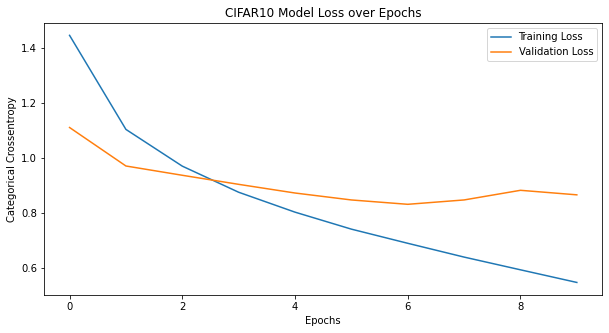

In [59]:
plt.figure(figsize=(10,5))
plt.plot(metrics_df.index, metrics_df.loss)
plt.plot(metrics_df.index, metrics_df.val_loss)
plt.title('CIFAR10 Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

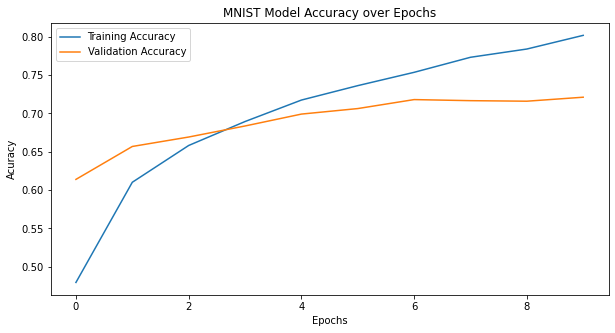

In [60]:
plt.figure(figsize=(10,5))
plt.plot(metrics_df.index, metrics_df.accuracy)
plt.plot(metrics_df.index, metrics_df.val_accuracy)
plt.title('MNIST Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Acuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()